In [1]:
import numpy as np

def cost_func(s, d):
    fuel = 0.1 * s**2 + 0.5 * d
    delivery = d/s + 0.1 * d
    return fuel + delivery


def gradientS(s, d):
    fuel = 0.2 * s
    delivery = -d / s**2
    return fuel + delivery

def gradientD(s, d):
    fuel = 0.5
    delivery = 1/s + 0.1
    return fuel + delivery

def sgdm(lr, iter,mome):
    s = 50
    d = 100
    bs=0
    bd=0
    for i in range(iter):
        grads = gradientS(s, d)
        gradd = gradientD(s, d)


        bs = mome * bs + lr * grads
        bd = mome * bd + lr * gradd

        s=s-bs
        d=d-bd

        cost = cost_func(s, d)
        print(f"Iteration {i+1}: Speed = {s}, Distance = {d}, Cost = {cost}")

lr = 0.1
iter = 3
mome = 0.9

sgdm(lr, iter,mome)

Iteration 1: Speed = 49.004, Distance = 99.938, Cost = 302.1413861400375
Iteration 2: Speed = 47.13168166953726, Distance = 99.82015935025713, Cost = 284.14953668924966
Iteration 3: Speed = 44.508455117792394, Distance = 99.65198105040311, Cost = 260.13039128271106


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/content/GME_stock.csv')

In [4]:
data.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


In [5]:
data.isnull().sum()

date              0
open_price        0
high_price        0
low_price         0
close_price       0
volume            0
adjclose_price    0
dtype: int64

In [6]:
data.columns

Index(['date', 'open_price', 'high_price', 'low_price', 'close_price',
       'volume', 'adjclose_price'],
      dtype='object')

In [7]:
from sklearn.preprocessing import MinMaxScaler

cols=[ 'open_price', 'high_price', 'low_price', 'close_price',
       'volume', 'adjclose_price']
for i in cols:
  ss=MinMaxScaler()
  data[i] = ss.fit_transform(data[i].values.reshape(-1, 1))

In [8]:
data.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,0.744787,1.000000,0.445076,0.553509,0.298653,0.553826
1,2021-01-27,1.000000,0.785443,1.000000,1.000000,0.474441,1.000000
2,2021-01-26,0.243508,0.306337,0.315018,0.421166,0.907501,0.421576
3,2021-01-25,0.266720,0.325459,0.237633,0.214644,0.903872,0.215202
4,2021-01-22,0.112904,0.153772,0.161303,0.180471,1.000000,0.181052


In [9]:
x=data.drop(columns=['close_price','date'])
y=data['close_price']

In [10]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2
from sklearn.model_selection import train_test_split

modelDrop = Sequential([
    Dense(64, activation='relu', input_shape=(xtrain.shape[1],), kernel_regularizer=l1(0.01)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l1(0.01)),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer=l1(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [12]:
modelL1 = Sequential([
    Dense(64, activation='relu', input_shape=(xtrain.shape[1],), kernel_regularizer=l1(0.01)),
    Dense(32, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(16, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(1, activation='sigmoid')
])

In [13]:
modelL2 = Sequential([
    Dense(64, activation='relu', input_shape=(xtrain.shape[1],), kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

In [14]:
modelEN = Sequential([
    Dense(64, activation='relu', input_shape=(xtrain.shape[1],), kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    Dense(1, activation='sigmoid')
])

In [15]:
modelDrop.compile(optimizer='adam', loss='mse')
modelL1.compile(optimizer='adam', loss='mse')
modelL2.compile(optimizer='adam', loss='mse')
modelEN.compile(optimizer='adam', loss='mse')

In [18]:
epochs = 10
modelDrop.fit(xtrain, ytrain, epochs=epochs, validation_data=(xtest, ytest))
modelL1.fit(xtrain, ytrain, epochs=epochs, validation_data=(xtest, ytest))
modelL2.fit(xtrain, ytrain, epochs=epochs, validation_data=(xtest, ytest))
modelEN.fit(xtrain, ytrain, epochs=epochs, validation_data=(xtest, ytest))

Epoch 1/10
120/120 [==============================] - 2s 3ms/step - loss: 2.6139 - val_loss: 1.3502
Epoch 2/10
120/120 [==============================] - 0s 3ms/step - loss: 0.6454 - val_loss: 0.1714
Epoch 3/10
120/120 [==============================] - 0s 3ms/step - loss: 0.0744 - val_loss: 0.0250
Epoch 4/10
120/120 [==============================] - 0s 3ms/step - loss: 0.0192 - val_loss: 0.0101
Epoch 5/10
120/120 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.0066
Epoch 6/10
120/120 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.0056
Epoch 7/10
120/120 [==============================] - 0s 3ms/step - loss: 0.0075 - val_loss: 0.0053
Epoch 8/10
120/120 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0052
Epoch 9/10
120/120 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0051
Epoch 10/10
120/120 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0051

In [19]:
loss_drop = modelDrop.evaluate(xtest, ytest)
print("mse:",loss_drop)

loss_l1 = modelL1.evaluate(xtest, ytest)
print("mse:",loss_l1)

loss_l2 = modelL2.evaluate(xtest, ytest)
print("mse:",loss_l2)

loss_en = modelEN.evaluate(xtest, ytest)
print("mse:",loss_en)

30/30 [==============================] - 0s 2ms/step - loss: 0.0051
mse: 0.005117498338222504
30/30 [==============================] - 0s 2ms/step - loss: 0.0049
mse: 0.004932594019919634
30/30 [==============================] - 0s 2ms/step - loss: 0.0029
mse: 0.002851239638403058
30/30 [==============================] - 0s 2ms/step - loss: 0.0050
mse: 0.00499211298301816


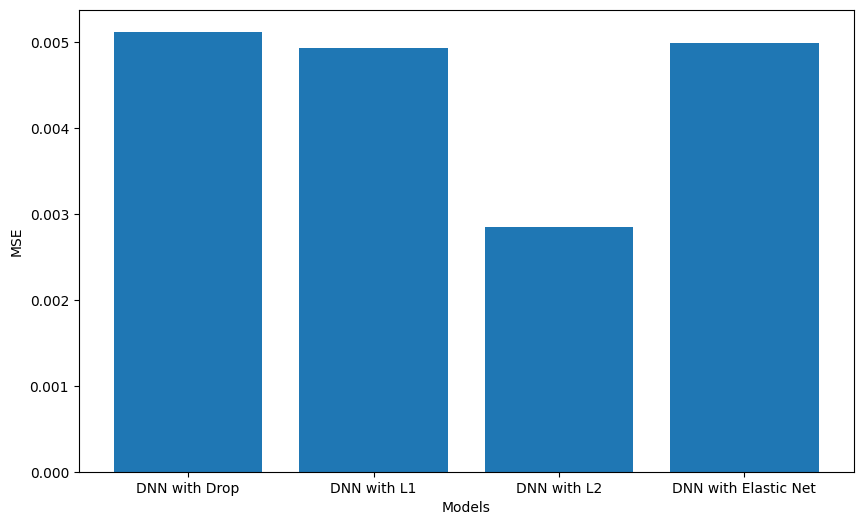

In [20]:
import matplotlib.pyplot as plt

mse_values = [loss_drop, loss_l1, loss_l2, loss_en]
model_names = ['DNN with Drop', 'DNN with L1', 'DNN with L2', 'DNN with Elastic Net']


plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values)
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()